In [4]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [5]:
ds = xr.open_dataset("CMSFluxNEE_2012_v1.nc4", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (lon: 72, lat: 46, time: 2928)
Coordinates:
  * lon      (lon) float32 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0
  * time     (time) datetime64[ns] 2012-01-01T03:00:00 ... 2013-01-01
Data variables:
    NEE      (time, lat, lon) float32 ...
    Area     (lat) float32 ...
Attributes: (12/24)
    ShortName:                      CMSFluxNEE
    LongName:                       Carbon Monitoring System Carbon Flux for ...
    VersionID:                      1
    IdentifierProductDOIAuthority:  http://dx.doi.org
    IdentifierProductDOI:           10.5067/4ACY6GOWQ7BB
    Format:                         NetCDF-4
    ...                             ...
    title:                          CMSFluxNEE_2012_v1
    model:                          CMS-Flux-V1
    source:                         Kevin W Bowman/JPL
    history:                        V1 produced 9/2017
    contact:                        kevin.w.bowman@jpl.nasa.gov
    institution:                    JPL/NASA

# question 1

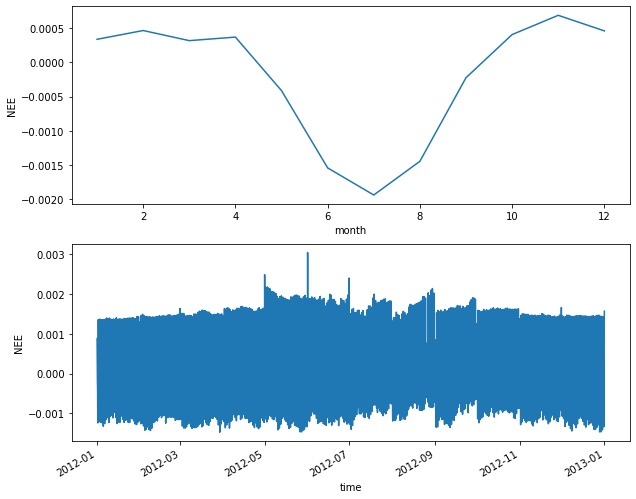

In [19]:
plt.figure(figsize=(10, 8))
NEE_Mon = ds.NEE.groupby('time.month')
NEE_Mon_anom = NEE_Mon - NEE_Mon.mean(dim = 'time')
ax = plt.subplot(2,1,2)
NEE_Mon_anom.mean(dim=['lat','lon']).plot()
ax = plt.subplot(2,1,1)
NEE_Mon.mean().mean(dim=['lat','lon']).plot()

# Question 2

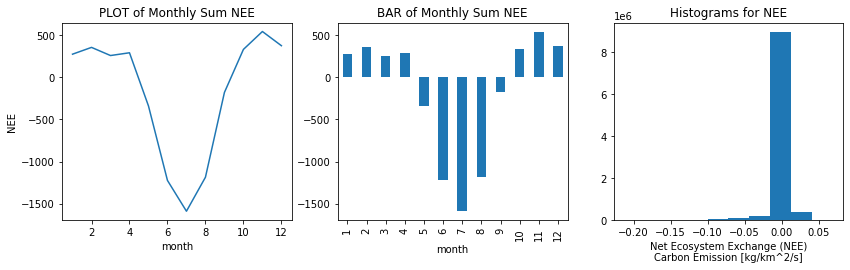

In [7]:
plt.figure(figsize=(14, 8))

NEE_Mon_Tol_SUM = ds.NEE.groupby('time.month').sum().sum(dim=('lat', 'lon'))
ax = plt.subplot(2, 3, 1)
NEE_Mon_Tol_SUM.plot()
ax.set_title('PLOT of Monthly Sum NEE')

ax = plt.subplot(2, 3, 2)
NEE_Mon_Tol_SUM.to_series().plot(kind='bar')
ax.set_title('BAR of Monthly Sum NEE')

ax = plt.subplot(2, 3, 3)
ds.NEE.plot()
ax.set_title('Histograms for NEE')

plt.show()

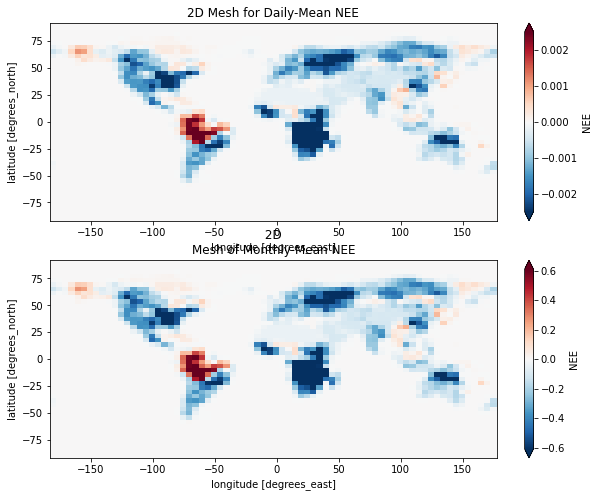

In [33]:
plt.figure(figsize=(10, 8))

ax = plt.subplot(2,1, 1)
ds.NEE.mean(dim='time').plot(robust=True)
ax.set_title('2D Mesh for Daily-Mean NEE')


ax = plt.subplot(2,1, 2)
ds.NEE.groupby('time.month').sum().mean(dim='month').plot(robust=True)
ax.set_title(' 2DMesh of Monthly-Mean NEE')
plt.show()